# Kernel CSDA

Siguendo a Potworosky et al, vamos a implementar el kCSDA aquí y tratar de hacer que funcione bien.


### Problema 1 a) Calcular $b_j (x_k)$

Usa tu cabeza chico: en realidad sólo necesitas una TABLOTA de los valores de la integral resuelta, de forma que cubra toda la matriz para cualquier $x_k$ válido que escogas, lo que haría que *"solo"* tuvieras que resolver los valores para una malla de $129·129$ puntos o algo asi: pero tienes simetría rotacional respecto al centro $j$-
ésimo, así que en realidad puedes reducir esto bastante: calculemos esto en una rebanada de un octavo de cuadrado (un cuadrante de la matriz reducido a la mitad). Para "ahorrarme" trabajo después copiare los resultados en todos los octantes y guardare la tabla como una matrizota.

In [29]:
#Constantes
#Las unidades de distancia estan en unidades de distancia inter electrodos:  
#1 u.a.=42 µm
sigma=1.0
h=8+1/3  #350/42
radio=0.5  #Las primeras pruebas las hiciste con radio=5. Quedaron demasiado suaves... borraste info.
toldura=0.0001 #menos de eso y por alguna razón se chinga la integral en (x,y)=(1,3)

0.0001

Pero antes... quiero ver como se VE la función que voy a integrar.

In [2]:
using PyPlot

In [30]:
function duro(x::Number)
    if abs(x)<radio
        return 1.0
    else
        return 0
    end
end


function suave(x::Number)
    result=exp(-x^2/(2*radio))
    return result
end

function bkerneldura(x::Number)
    xcero=2
        result=asinh(h/sqrt((x-xcero)^2))*duro(x)
    return result
end

function bkernelsuave(x::Number)
    xcero=2
    result=asinh(h/sqrt((x-xcero)^2))*suave(x)
    return result
end



bkernelsuave (generic function with 1 method)

In [31]:
xxs=-10:0.051:10
yys=map(bkerneldura,xxs);
otrayys=map(bkernelsuave,xxs);

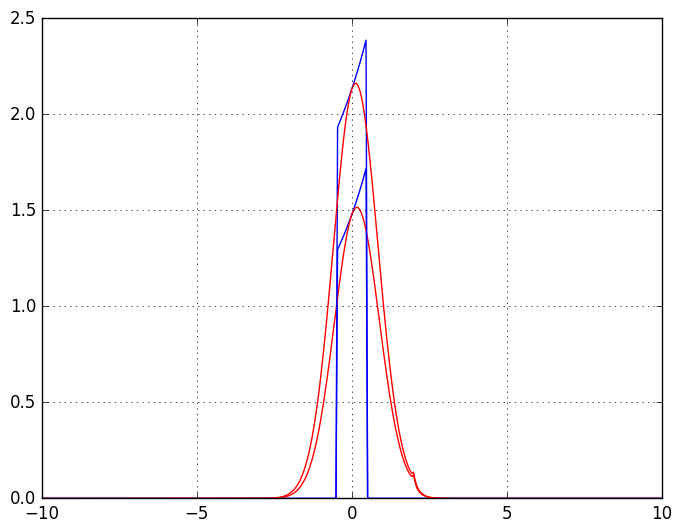

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdd5ea9f6a0>

In [33]:
grid(true)
plot(xxs,yyshchica,c="blue")
plot(xxs,otrayyshchica,c="red")
plot(xxs,yys,c="blue")
plot(xxs,otrayys,c="red")

Bien. Parece que los dos se parecen mucho cerca de la singularidad, y que no hay nada que ver después de 2 distancias de R, en la imagen de arriba tenemos que R=2, xcero=1, h=1. 

In [5]:
function distancia2d(x1::Number,y1::Number,x2::Number,y2::Number)
    result=sqrt((x1-x2)^2+(y1-y2)^2)
    return result
end

function distancia2d(x1::Array,x2::Array)
    result=distancia2d(x1[1],x1[2],x2[1],x2[2])
    return result
end

distancia2d (generic function with 2 methods)

In [ ]:
a=[1.0,2.0]

b=[0.0,0.0]

In [ ]:
distancia2d(0.1,2,0.7,0.1)

In [ ]:
distancia2d(a,b)

In [6]:
function duro2D(x1::Number,y1::Number)
    if distancia2d(x1,y1,0,0)<=radio
        return 1.0
    else
        return 0
    end
end
    
function suave2D(x1::Number,y1::Number)
    result=exp(-distancia2d(x1,y1,0,0)/(2*radio))
    return result
end
   

function bKernelDuro2D(x1::Number,y1::Number, x2::Number,y2::Number)
    #=
    Acuerdate: Estos estan centrados en el origen, despues los vamos trasla<dando 
    sea necesario 
    =#
    dist=distancia2d(x1,y1,x2,y2)
    result=asinh(h/dist)*duro2D(x2,y2)
    return result
end

function bKernelSuave2D(x1::Number,y1::Number, x2::Number,y2::Number)
    #=
    Acuerdate: Estos estan centrados en el origen, despues los vamos trasla<dando 
    sea necesario 
    =#
    dist=distancia2d(x1,y1,x2,y2)
    result=asinh(h/dist)*suave2D(x2,y2)
    return result
end


bKernelSuave2D (generic function with 1 method)

In [9]:
xefecto=[1.0,0.50]
xobservador=[13.0,15.0]

2-element Array{Float64,1}:
 13.0
 15.0

In [7]:
xxs=-63:63
yys=-63:63

-63:63

In [10]:
matrizevaluacionobservadores=zeros(127,127);
matrizevaluacioncausantesres=zeros(127,127);
btildesuavecero=zeros(127,127)
btildeduracero=zeros(127,127) 
for j in 1:127, k in 1:127
    x=xxs[j]
    y=yys[k]
    zz1=bKernelDuro2D(x,y, xefecto[2],xefecto[1])
    matrizevaluacionobservadores[k,j]=zz1
    zz2=bKernelDuro2D(xobservador[1],xobservador[2],x,y)
    matrizevaluacioncausantesres[k,j]=zz2   
    btildesuavecero[k,j]=suave2D(x,y)
    btildeduracero[k,j]=duro2D(x,y)
end

In [7]:
writedlm("BtildeSuaveCero_radio_$radio.dat",btildesuavecero)
writedlm("BtildeDuraCero_radio_$radio.dat",btildeduracero)

In [11]:
btildeduracero[58:70,58:70]

13x13 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
ion()
xlim(-64,64)
ylim(-64,64)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(btildeduracero, origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [ ]:
xlim(-10,10)
ylim(-10,10)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(matrizevaluacioncausantesres, origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [ ]:
matrizevaluacioncausantesres[1,1]

Bueno, hasta aquí parece que vamos bien: Ahora fijamos las $x$ del Observador e integremos la chiva respecto a las fuentes.

In [33]:
using Cubature

In [55]:
#En este caso el soporte de la integral esta contenido en una bola en 
@time hcubature(x ->
    bKernelDuro2D(xobservador[1]+0.001,xobservador[2]+0.001, x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=toldura)

  0.582739 seconds (9.35 M allocations: 173.240 MB, 2.68% gc time)


(32.282808674696675,0.0032282323333610668)

In [61]:
@time hcubature(x ->
bKernelDuro2D(xxs[63],yys[61], x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=0.00005)

  0.934137 seconds (11.34 M allocations: 225.013 MB, 2.36% gc time)


(123.55176109231626,0.006177222597403406)

In [60]:
64*32*0.5/60

17.066666666666666

In [63]:
limint=22*radio #Suficiente: nada se ve mucho mas lejos que esto (depende de h)

@time (chula,errir)=hcubature(x ->
bKernelSuave2D(xobservador[1]+0.001,xobservador[2]+0.001, x[1],x[2]),
[-limint,-limint],[limint,limint],reltol=0.00001)

  0.011261 seconds (136.76 k allocations: 2.458 MB)


(247.21920159030586,0.002442878308639903)

In [13]:
@time (chula,errir)=hcubature(x ->
bKernelSuave2D(0.00001,0.00001, x[1],x[2]),
[-limint,-limint],[limint,limint],reltol=0.00001)

  0.008229 seconds (114.32 k allocations: 2.149 MB)


(393.1051131897264,0.0038945993348382594)

In [14]:
bcerodura=zeros(127,127)
bcerosuave=zeros(127,127);

In [15]:
#Evaluemos solo la parte de medio cuadrante superior de la matriz. 
#El resto lo obtenemos por reflecciones.
#Por convenciencia, evaluemos la matriz completa sobre -64:64^2
# El "origen" de la Matriz está en en [64,64]
#Por alguna razón el kernel de bordes duros es MUCHO mas lento de evaluar
#que el gaussiano.
deltita=0

@time for j in 64:127, k in 64:j

    (zz1,pupu)=hcubature(x ->
    bKernelDuro2D(xxs[j]+deltita,yys[k]+deltita, x[1],x[2]),
    [-radio,-radio],[radio,radio],reltol=toldura)
    bcerodura[k,j]=zz1

    (zz2,pupu)=hcubature(x ->
    bKernelSuave2D(xxs[j]+deltita,yys[k]+deltita, x[1],x[2]),
    [-limint,-limint],[limint,limint],reltol=0.00001)
    bcerosuave[k,j]=zz2

end

 99.829115 seconds (1.38 G allocations: 26.654 GB, 1.92% gc time)


In [24]:
j=64
k=64
deltita=0.0000001
(bcerodura[k,j], pupu)=hcubature(x ->
bKernelDuro2D(xxs[j]+deltita,yys[k]+deltita, x[1],x[2]),
[-radio,-radio],[radio,radio],reltol=0.001)

(bcerosuave[k,j],pupu)=hcubature(x ->
    bKernelSuave2D(xxs[j]+deltita,yys[k]+deltita, x[1],x[2]),
[-limint,-limint],[limint,limint],reltol=0.00001)

(116.65587463286872,0.0011544053914483206)

In [28]:
for j in 64:127, k in 64:j
    bcerodura[j,k]=bcerodura[k,j]
    bcerosuave[j,k]=bcerosuave[k,j]
end

In [29]:
for j in 64:127, k in 64:127
    bcerodura[127-k+1,127-j+1]=bcerodura[k,j]
    bcerodura[127-k+1,j]=bcerodura[k,j]
    bcerodura[k,127-j+1]=bcerodura[k,j]
    
    bcerosuave[127-k+1,127-j+1]=bcerosuave[k,j]
    bcerosuave[127-k+1,j]=bcerosuave[k,j]
    bcerosuave[k,127-j+1]=bcerosuave[k,j]
end

In [25]:
bcerosuave[64,64]

116.65587463286872

In [ ]:
xlim(-64,64)
ylim(-64,64)
zlimitemax=4
zlimitemin=0
grid(true)
figuru=imshow(bcerodura,origin="lower",extent=[-63,63,-63,63], 
interpolation="none", cmap="viridis")
cb=colorbar(figuru)

In [30]:
bcerosuave

127x127 Array{Float64,2}:
 6.4394   6.49061  6.54221  6.59419  …  6.59419  6.54221  6.49061  6.4394 
 6.49061  6.54306  6.59593  6.64921     6.64921  6.59593  6.54306  6.49061
 6.54221  6.59593  6.6501   6.70471     6.70471  6.6501   6.59593  6.54221
 6.59419  6.64921  6.70471  6.7607      6.7607   6.70471  6.64921  6.59419
 6.64653  6.70289  6.75976  6.81714     6.81714  6.75976  6.70289  6.64653
 6.69924  6.75695  6.81522  6.87405  …  6.87405  6.81522  6.75695  6.69924
 6.75228  6.81139  6.87109  6.93139     6.93139  6.87109  6.81139  6.75228
 6.80565  6.86618  6.92735  6.98915     6.98915  6.92735  6.86618  6.80565
 6.85932  6.92131  6.98398  7.04732     7.04732  6.98398  6.92131  6.85932
 6.91328  6.97676  7.04096  7.10588     7.10588  7.04096  6.97676  6.91328
 6.96751  7.03251  7.09828  7.16481  …  7.16481  7.09828  7.03251  6.96751
 7.02199  7.08854  7.15591  7.22409     7.22409  7.15591  7.08854  7.02199
 7.07669  7.14482  7.21382  7.28369     7.28369  7.21382  7.14482  7.07669

In [32]:
writedlm("BceroDura-r-$radio.dat", bcerodura)
writedlm("BceroSuave-r-$radio.dat", bcerosuave)

In [16]:
bli=readdlm("/home/karel/Downloads/BceroDura\ (1).dat")
blu=readdlm("BceroDura-r-5.0.dat")

127x127 Array{Float64,2}:
 7.33932  7.39762  7.45634  7.51557  …  7.51557  7.45634  7.39762  7.33932
 7.39762  7.45744  7.51763  7.57827     7.57827  7.51763  7.45744  7.39762
 7.45634  7.51763  7.57942  7.6416      7.6416   7.57942  7.51763  7.45634
 7.51557  7.57827  7.6416   7.70545     7.70545  7.6416   7.57827  7.51557
 7.57522  7.63943  7.70425  7.76972     7.76972  7.70425  7.63943  7.57522
 7.63524  7.70101  7.76741  7.83447  …  7.83447  7.76741  7.70101  7.63524
 7.69569  7.76304  7.83107  7.89978     7.89978  7.83107  7.76304  7.69569
 7.7565   7.82548  7.89518  7.9656      7.9656   7.89518  7.82548  7.7565 
 7.81766  7.8883   7.95971  8.03188     8.03188  7.95971  7.8883   7.81766
 7.87915  7.95148  8.02464  8.09861     8.09861  8.02464  7.95148  7.87915
 7.94094  8.01501  8.08995  8.16576  …  8.16576  8.08995  8.01501  7.94094
 8.00302  8.07885  8.15561  8.2333      8.2333   8.15561  8.07885  8.00302
 8.06535  8.14298  8.2216   8.30121     8.30121  8.2216   8.14298  8.06535

In [27]:
a=bli-blu;
a[61,63]

-19.867997321138986

In [28]:
bli[61,63]

123.54784400809176

In [30]:
blu[61,63]

143.41584132923074

In [31]:
bli[60:69,60:69]

10x10 Array{Float64,2}:
  94.6314  103.006   109.883   113.996  …  103.006    94.6314   86.5234
 103.006   112.626   119.464   123.548     112.626   103.006    92.6194
 109.883   119.464   126.266   130.334     119.464   109.883    97.9374
 113.996   123.548   130.334   134.388     123.548   113.996   101.657 
 115.362   124.911   131.687   135.738     124.911   115.362   103.004 
 113.996   123.548   130.334   134.388  …  123.548   113.996   101.657 
 109.883   119.464   126.266   130.334     119.464   109.883    97.9374
 103.006   112.626   119.464   123.548     112.626   103.006    92.6194
  94.6314  103.006   109.883   113.996     103.006    94.6314   86.5234
  86.5234   92.6194   97.9374  101.657      92.6194   86.5234   80.2771

In [32]:
blu[60:69,60:69]

10x10 Array{Float64,2}:
  94.6396  103.011   109.89    114.001  …  103.011    94.6396   86.5295
 103.011   112.633   119.47    143.416     112.633   103.011    92.6252
 109.89    119.47    126.277   130.342     119.47    109.89     97.9454
 114.001   143.416   130.342   134.4       143.416   114.001   101.662 
 115.364   124.909   131.689   135.745     124.909   115.364   103.007 
 114.001   143.416   130.342   134.4    …  143.416   114.001   101.662 
 109.89    119.47    126.277   130.342     119.47    109.89     97.9454
 103.011   112.633   119.47    143.416     112.633   103.011    92.6252
  94.6396  103.011   109.89    114.001     103.011    94.6396   86.5295
  86.5295   92.6252   97.9454  101.662      92.6252   86.5295   80.2849